In [23]:
## Import library

import pandas as pd 
import keras
import numpy as np
import matplotlib.pyplot as plt
from cleanlab.classification import CleanLearning
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from cleanlab import *
# from torch import nn


ModuleNotFoundError: No module named 'cleanlab.models'

In [2]:
## Load the datas 

fmnist_test = pd.read_csv('fashion-mnist_test.csv')
fmnist_train = pd.read_csv('fashion-mnist_train.csv')

In [3]:
## Sort datas in x and y 

label_fmnist_test = fmnist_test.iloc[:,0]
label_fmnist_train = fmnist_train.iloc[:,0]
fmnist_test = fmnist_test.iloc[:,1:]
fmnist_train = fmnist_train.iloc[:,1:]

In [4]:
##Our label is jsute a number,

label_fmnist_test.shape

(10000,)

In [5]:
## We create a vector for the output

label_fmnist_test = keras.utils.to_categorical(label_fmnist_test, 10)
label_fmnist_train = keras.utils.to_categorical(label_fmnist_train, 10)

normalized_fmnist_test = fmnist_test /255
normalized_fmnist_train = fmnist_train /255

In [6]:
## We then constructs our pictures 
fashion_test = np.array(normalized_fmnist_test)
fashion_test = fashion_test.reshape(-1,28,28,1)

fashion_train = np.array(normalized_fmnist_train)
fashion_train = fashion_train.reshape(-1,28,28,1)

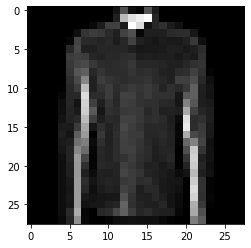

In [7]:
## Show if its good 
exemple_image = fashion_test[77,:,:,0]
plt.imshow(exemple_image, cmap='gray')

In [17]:
#We can now construct the model. We use the Kerass Sequential API.

model = KerasWrapperSequential()

#First we are going to do Conv2D then pooling then flatten.
#For the first test we use padding='valid' and strides=(1, 1) as classic Conv2D and without dropout.
model.add(keras.layers.Conv2D(8, (3, 3), padding='valid',strides=(1, 1), input_shape=(28, 28, 1)))
model.activation = 'relu'
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Conv2D(16, (3, 3), padding='valid',strides=(1, 1)))
model.activation = 'relu'
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Flatten())

#we add a dense layer with 10 neurons
model.add(keras.layers.Dense(10))
model.activation = 'relu'
# model.add(keras.layers.Dropout(0.2))

#We finallys add a dense layer with 10 neurons and softmax activation to have the probabilities for each class.
model.add(keras.layers.Dense(10, activation='softmax'))

In [18]:
model.compile(optimizer='adam',loss='mae',metrics=['accuracy'])

In [22]:
#We must now fit the model : 
K.set_value(model.optimizer.learning_rate, 0.0001)
print("Learning rate is:", model.optimizer.learning_rate.numpy())

history = model.fit(
    fashion_train, label_fmnist_train,
    validation_data=(fashion_test,label_fmnist_test),
    batch_size=100, 
    epochs=10
)

Learning rate is: 1e-04
Epoch 1/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0590 - accuracy: 0.7071 - val_loss: 0.0588 - val_accuracy: 0.7076
Epoch 2/10
600/600 [==============================] - 7s 11ms/step - loss: 0.0588 - accuracy: 0.7083 - val_loss: 0.0587 - val_accuracy: 0.7090
Epoch 3/10
600/600 [==============================] - 7s 11ms/step - loss: 0.0587 - accuracy: 0.7087 - val_loss: 0.0587 - val_accuracy: 0.7083
Epoch 4/10
600/600 [==============================] - 7s 11ms/step - loss: 0.0586 - accuracy: 0.7095 - val_loss: 0.0586 - val_accuracy: 0.7099
Epoch 5/10
600/600 [==============================] - 6s 11ms/step - loss: 0.0585 - accuracy: 0.7098 - val_loss: 0.0585 - val_accuracy: 0.7100
Epoch 6/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0585 - accuracy: 0.7095 - val_loss: 0.0585 - val_accuracy: 0.7094
Epoch 7/10
600/600 [==============================] - 6s 9ms/step - loss: 0.0584 - accuracy: 0.7104 - val_loss: 0.0584 

In [ ]:
cl = CleanLearning(model)
label_issues = cl.find_label_issues(fashion_train, label_fmnist_train)  # identify mislabeled examples

cl.fit(fashion_train, label_fmnist_train, label_issues=label_issues)
preds = cl.predict(fashion_test)  # predictions from a version of your model
                               # trained on auto-cleaned data